In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Read .CSV file data

In [4]:
df = pd.read_csv("retail_sales.csv")

### Check top 5 data in CSV file

In [5]:
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Product,Quantity,UnitPrice,TotalAmount,PurchaseDate,PaymentMethod
0,1001,C001,Male,25,New York,Electronics,Smartphone,1,699.0,699,2024-01-05,Credit Card
1,1002,C002,Female,32,Los Angeles,Clothing,T-Shirt,3,25.0,75,2024-01-06,Cash
2,1003,C003,Male,41,Chicago,Groceries,Apples,5,2.0,10,2024-01-07,Debit Card
3,1004,C004,Female,29,Houston,Clothing,Jeans,2,40.0,80,2024-01-07,Credit Card
4,1005,C005,Female,35,New York,Electronics,Laptop,1,1200.0,1200,2024-01-08,Online Payment


## Matplotlib Section – Questions & Answers
### 1. Histogram of Customer Ages

#### Q: What is the age distribution of our customers?
#### A: The histogram shows which age groups are most common among customers. If most purchases are from the 25–35 range, this indicates the target audience is young adults.

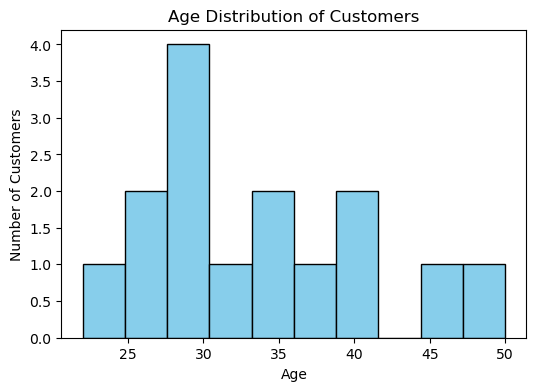

In [12]:
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()


### 2. Bar Chart: Total Sales by Product Category

#### Q: Which product categories contribute most to total revenue?
#### A: The bar chart highlights top-performing categories. For example, Electronics may dominate sales, while Groceries generate smaller revenue. This helps prioritize inventory and marketing.

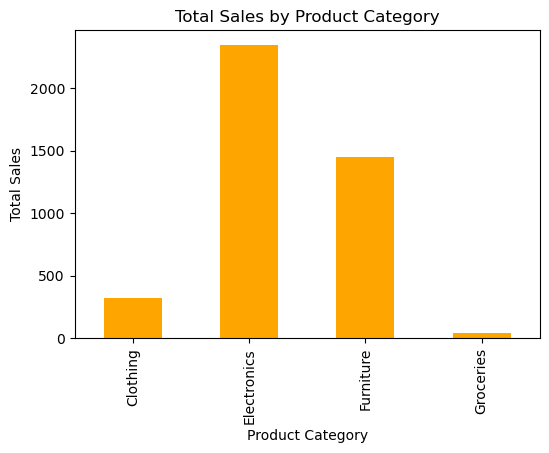

In [7]:
sales_by_category = df.groupby('ProductCategory')['TotalAmount'].sum()

plt.figure(figsize=(6,4))
sales_by_category.plot(kind='bar', color='orange')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

### 3. Pie Chart: Sales Contribution by City

#### Q: Which cities contribute the most to overall sales?
#### A: The pie chart shows percentage contributions. For instance, New York and Los Angeles may drive the majority of sales, suggesting these are key markets for expansion or customer engagement campaigns.

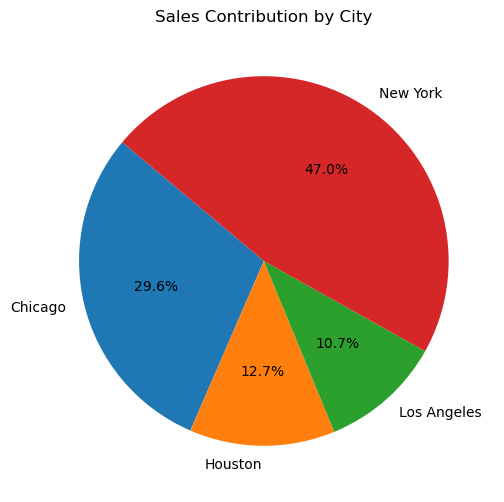

In [14]:
sales_by_city = df.groupby('City')['TotalAmount'].sum()

plt.figure(figsize=(6,6))
sales_by_city.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Sales Contribution by City")
plt.ylabel("")
plt.show()

### 4. Bar Chart: Quantity Sold by Product

#### Q: Which individual products are most popular among customers?
#### A: This chart shows purchase volumes. For example, Groceries like Apples might sell in large quantities, while high-value items like Laptops sell fewer units but bring higher revenue.

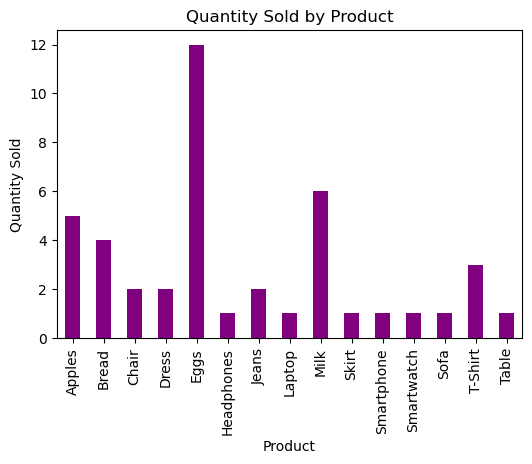

In [17]:
quantity_by_product = df.groupby('Product')['Quantity'].sum() 
plt.figure(figsize=(6,4)) 
quantity_by_product.plot(kind='bar', color='purple') 
plt.title("Quantity Sold by Product") 
plt.xlabel("Product") 
plt.ylabel("Quantity Sold") 
plt.show()

### 5. Pie Chart: Payment Method Distribution

#### Q: What payment methods do customers prefer?
#### A: The pie chart reveals payment preferences. For example, if Credit Card and Online Payment dominate, it suggests digital transactions are more common than cash. Businesses can optimize by promoting online offers.

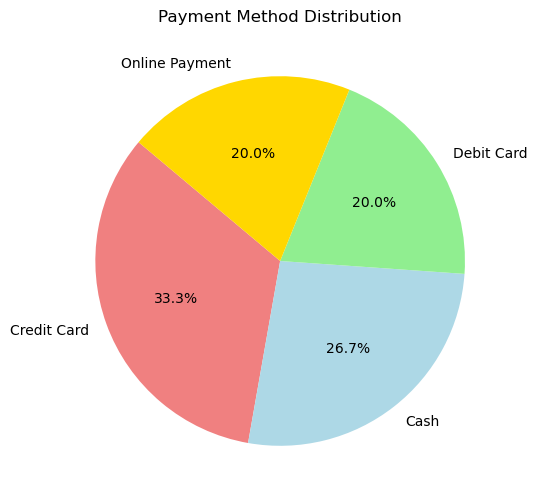

In [10]:
payment_counts = df['PaymentMethod'].value_counts()

plt.figure(figsize=(6,6))
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral','lightblue','lightgreen','gold'])
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

## Seaborn Section – Questions & Answers
### 1. Scatter Plot

#### Q: Does age affect how much money customers spend?
#### A: Plot Age vs. TotalAmount. You may see younger vs older spending habits.

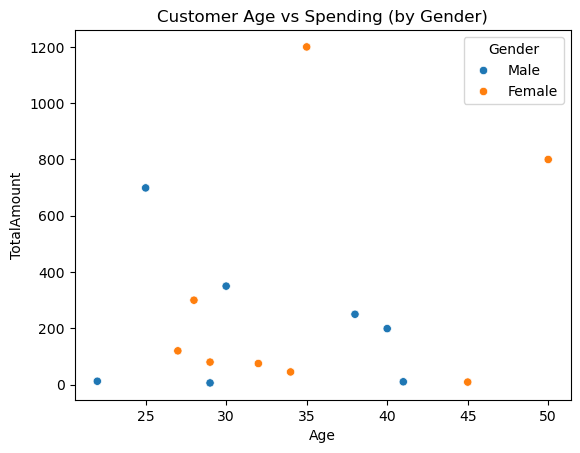

In [20]:
sns.scatterplot(data=df, x="Age", y="TotalAmount", hue="Gender")
plt.title("Customer Age vs Spending (by Gender)")
plt.show()

### 2. Histogram

#### Q: What is the distribution of purchase amounts?
#### A: Use a histogram of TotalAmount to see if most purchases are low, medium, or high value.

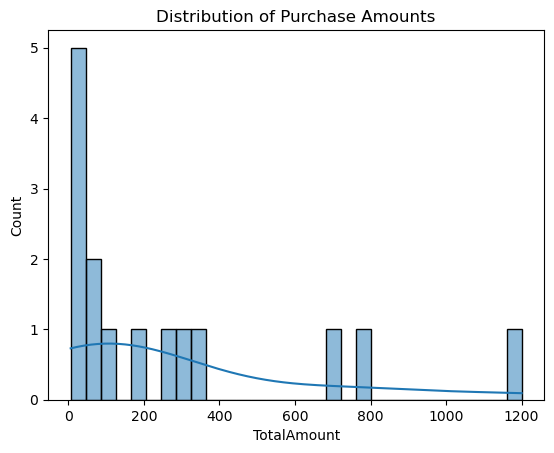

In [21]:
sns.histplot(data=df, x="TotalAmount", bins=30, kde=True)
plt.title("Distribution of Purchase Amounts")
plt.show()

### 3. Bar Plot

#### Q: Which product categories generate the highest sales revenue?
#### A: Sum TotalAmount by ProductCategory.

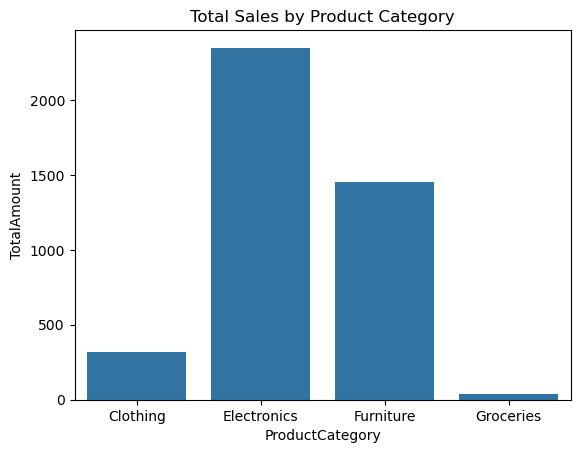

In [22]:
sales_by_category = df.groupby("ProductCategory")["TotalAmount"].sum().reset_index()
sns.barplot(data=sales_by_category, x="ProductCategory", y="TotalAmount")
plt.title("Total Sales by Product Category")
plt.show()

### 4. Box Plot

#### Q: Do men and women spend differently?
#### A: Compare TotalAmount across Gender.

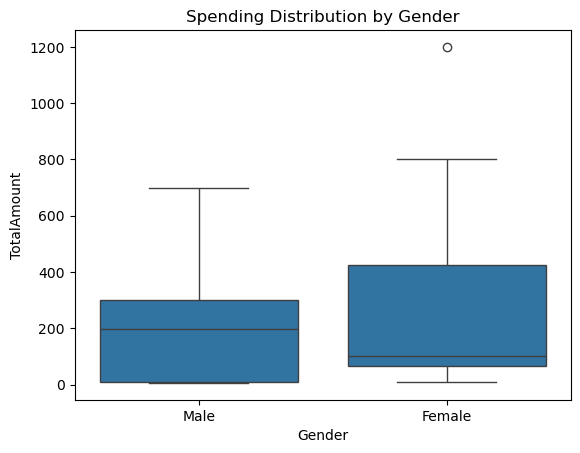

In [23]:
sns.boxplot(data=df, x="Gender", y="TotalAmount")
plt.title("Spending Distribution by Gender")
plt.show()

### 5. Pair Plot

#### Q: What relationships exist among numeric features (Age, Quantity, UnitPrice, TotalAmount)?
#### A: Use pairplot with hue="Gender".

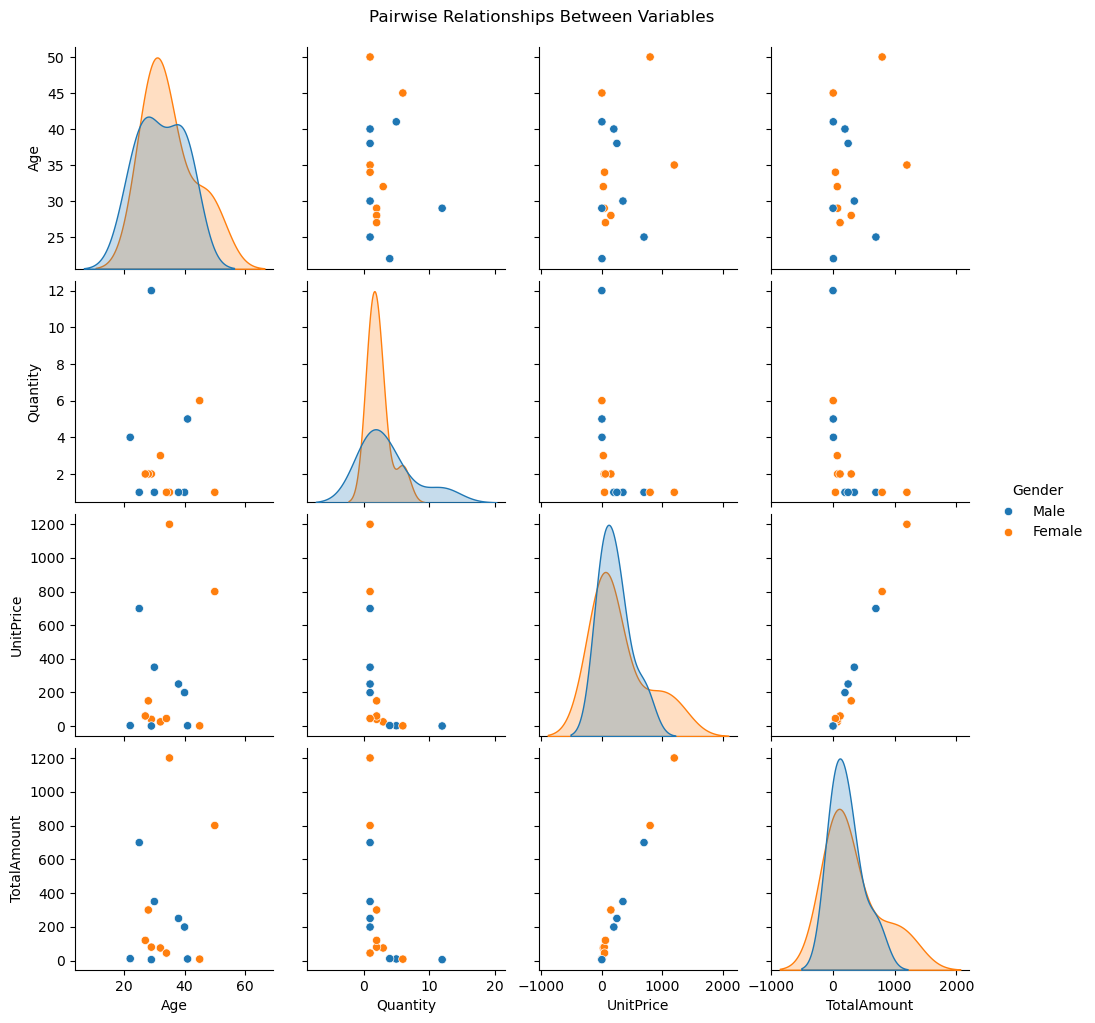

In [24]:
sns.pairplot(df[["Age", "Quantity", "UnitPrice", "TotalAmount", "Gender"]], hue="Gender")
plt.suptitle("Pairwise Relationships Between Variables", y=1.02)
plt.show()

### 6. Heatmap

#### Q: Which numeric features are correlated (e.g., Quantity, UnitPrice, TotalAmount)?
#### A: Check correlations with a heatmap.

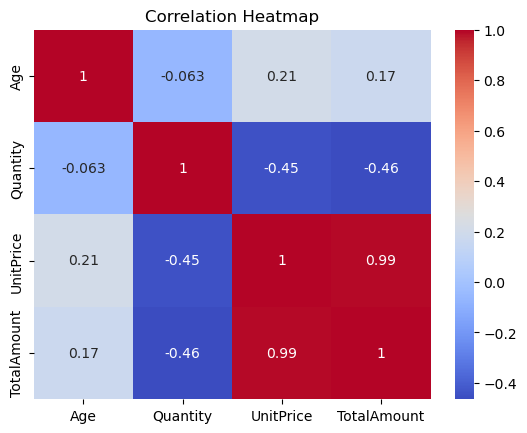

In [25]:
corr = df[["Age", "Quantity", "UnitPrice", "TotalAmount"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()